In [10]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import re,os,nltk
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [5]:
path='/home/shiva/Desktop/sample1/'
files=os.listdir(path)
f=open(os.path.join(path,files[2]),'r',encoding='utf-8').read()

In [11]:
def number_special_stop(text,stop):
    text=re.sub('[\d\W]',' ',text.lower())
    words=text.split(' ')
    text=' '.join([word for word in words if len(word)>2 and word not in stop])
    return text

def stem_lemma_posTag(words):
    stemmer=nltk.stem.PorterStemmer()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    if type(words) is list:
        words=list(set(words))
    else:
        words=list(set(text.split(' ')))
    stem_words=[stemmer.stem(word.strip()) for word in words]
    stem_text=' '.join(stem_words)
    try:
        lemma_words=[lemmatizer.lemmatize(word.strip()) for word in words]
        lemma_text=' '.join(lemma_words)
    except LookupError:
        nltk.download('wordnet')
        lemma_words=[lemmatizer.lemmatize(word.strip()) for word in words]
        lemma_text=' '.join(lemma_words)
    try:
        pos_tags=nltk.pos_tag(lemma_words)
    except LookupError:
        nltk.download('averaged_perceptron_tagger')
        pos_tags=nltk.pos_tag(words)
    return stem_text,lemma_text,pos_tags
def frequency_word(words):
    if type(words) is list:
        words=words
    else:
        words=words.split(' ')
    freq={word:words.count(word) for word in set(words)}
    return freq


In [12]:
ex_stopwords = ['cir','nos','vii','llc']
try:
    stop = nltk.corpus.stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
    stop = nltk.corpus.stopwords.words('english')
for st_word in ex_stopwords:
    stop.append(st_word)

In [13]:
text=number_special_stop(f,stop)
stem,lemma,pos=stem_lemma_posTag(text)

In [14]:
import gensim
from gensim.models import Doc2Vec

def doc2vec(words):
    document_tagged = []
    tagged_count = 0
    for word in words:
        document_tagged.append(gensim.models.doc2vec.TaggedDocument(word,[tagged_count]))
        tagged_count +=1 
    d2v = Doc2Vec(document_tagged)
    d2v.train(document_tagged,epochs=d2v.epochs,total_examples=d2v.corpus_count)
    return d2v.docvecs.vectors_docs

In [15]:
from sklearn.decomposition import PCA
def pca_fun(n_components, data):
    pca = PCA(n_components=n_components).fit(data)
    data = pca.transform(data)
    return data

In [23]:
# Let's explore the data representation of doc2vec for abstract column.
# Visualization the doc2vec representation
doc2vec = doc2vec(lemma.split(' ')) # takes string values
pca_data = pca_fun(2,doc2vec)

In [22]:
# importing KMeans library of sklearn
from sklearn.cluster import KMeans
def kmeans(n_clusters):
    kmean_model = KMeans(n_clusters = n_clusters,random_state=0)
    return kmean_model

In [35]:
kmeans5 = KMeans(10)
%time km5 = kmeans5.fit_predict(pca_data)
meta_data = kmeans5.labels_

CPU times: user 644 ms, sys: 3.22 ms, total: 647 ms
Wall time: 645 ms


In [36]:
color_code=['#333300','#cc99ff','#00cc99','#cc6699','#0000ff','#3333cc','#666699','#000099','#333399','#336699']
color = [color_code[i] for i in list(meta_data)]

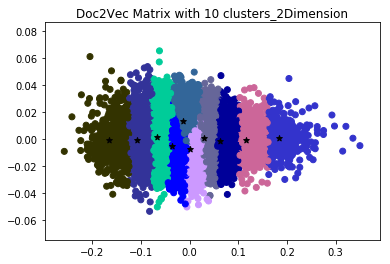

In [37]:
centroids =  pca_fun(2,kmeans5.cluster_centers_)
plt.scatter(pca_data[:, 0], pca_data[:, 1],c = color)
plt.scatter(centroids[:, 0], centroids[:, 1],marker='*',c='#000000',norm='l1')
plt.title("Doc2Vec Matrix with 10 clusters_2Dimension")
plt.show()